# Problem Statement


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house

How well those variables describe the price of a house

Also, determine the optimal value of lambda for ridge and lasso regression.




# Business Goal


You are required to model the price of houses with the available independent variables. It will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high rewards. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## importing basic libraries for reading observing and exploiting data

In [330]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Reading csv

In [331]:

house = pd.read_csv('train.csv')
print(house.shape)
house.head(10)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

### there are all together 1460 data points and 81 features

In [332]:
#go through the dataset, mean and everything listed below in the results
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [333]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## For a basic idea to start with let see how correlated are the variables 

In [334]:
corr = house.corr()
corr = corr.SalePrice.sort_values(ascending=False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### from the  above  for sure we can see  coorelation and this qualifies for a regression

In [335]:
#Setting the columns that can be displayed to max as 500 and rows to 300 (this would be usefull going forward)
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

## Null values and missing value treatment starts

In [336]:
#to find the total no of rows that are null for each column in the dataset
house.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [337]:
# Checking the percentage of null values in the dataframe 'housing' column-wise
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [338]:
# dropping  PoolQC,MiscFeature,Alley,Fence due to high percentage of null values

house.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis =1, inplace = True)

In [339]:
# Checking the percentage of null values in the dataframe 
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending=False)

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofMatl          0.00
RoofStyle         0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
Heating           0.00
BsmtFinSF2 

### From the above observations We are left with below variables for missing value treatments
### FireplaceQu,  LotFrontage,  GarageYrBlt,  GarageType,  GarageFinish,  GarageQual, 
### GarageCond,   BsmtExposure,  BsmtFinType2,  BsmtFinType1,  
### BsmtCond,     BsmtQual,    MasVnrType,  MasVnrArea, Electrical.        

### FireplaceQu,

In [340]:
#Checking the values and their distributions of the 'FireplaceQu'
house['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [341]:
#### As per the data dictionary if there is no fireplace they can have NA. 
#### As we can see that there is no NA in the values of the column, 
#### we can consider that the rows which were missing the values can be considered as NA.
#### Replacing the missing values with NA

In [342]:
house['FireplaceQu'] = house['FireplaceQu'].replace(np.nan, 'NA')

In [343]:
#Checking the values and their distributions of the 'FireplaceQu'
house['FireplaceQu'].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

### LotFrontage

In [344]:

house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

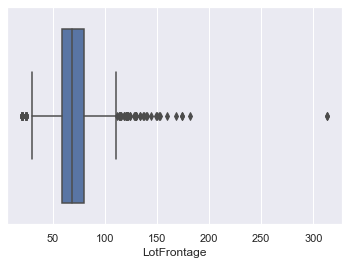

In [345]:
#To understand if thre are any outliers in the column
sns.boxplot('LotFrontage', data = house)

In [346]:
#### As we have seen there are so many outliers for the 'LotFrontage' column,
#### we will impute the missing values using the median of the column

In [347]:
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())

In [348]:
house['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

### GarageYrBlt

In [349]:

house['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [350]:
# lets import the datetime and get the age of the garage year blt using current year stats
import datetime as d
current_year = int(d.datetime.now().year)

In [351]:
#Caluculating the age of the garage based on the year it was built
house['GarageYrBlt'] = current_year-house['GarageYrBlt']

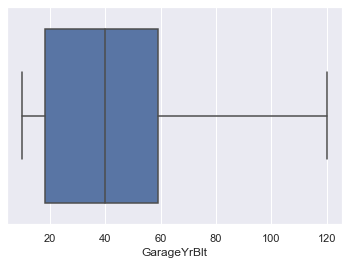

In [352]:
#To understand if thre are any outliers in the column
sns.boxplot('GarageYrBlt', data = house)

In [353]:
#There are no outliers so we can impute the data with the mean of the age of which garage was built
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['GarageYrBlt'].mean())

#### lets do the same excercise  for yearsold, yearbuilt and year remodeled.
#### calculate the age with current year

In [354]:
#Caluculating the number of years the house was sold from the current year
house['YrSold'] = current_year-house['YrSold']

In [355]:
#Caluculating the number of years the house was built from the current year
house['YearBuilt'] = current_year-house['YearBuilt']

In [356]:
#Caluculating the number of years the house was remodeled from the current year
house['YearRemodAdd'] = current_year-house['YearRemodAdd']

In [357]:
house['YrSold'].value_counts()

11    338
13    329
14    314
12    304
10    175
Name: YrSold, dtype: int64

In [358]:
house['YearBuilt'].value_counts()

14     67
15     64
16     54
13     49
17     45
44     33
43     32
100    30
61     26
22     25
21     25
66     24
20     24
62     24
55     24
50     24
12     23
48     23
18     23
52     22
49     22
19     20
63     20
70     20
58     19
26     19
11     18
80     18
25     18
54     18
60     17
110    17
27     17
53     16
42     16
57     16
65     16
95     16
56     15
24     15
79     15
72     14
51     14
23     14
59     14
64     14
28     13
67     12
71     12
30     12
32     11
47     11
46     10
105    10
40     10
120    10
36      9
41      9
94      9
84      9
90      9
45      8
104     8
81      8
98      8
106     7
102     7
92      7
74      7
97      7
96      7
38      6
85      6
89      6
69      6
99      6
75      6
68      5
73      5
39      5
83      5
35      5
34      5
29      5
91      4
140     4
88      4
82      4
37      4
31      3
101     3
33      3
108     3
93      3
86      3
78      2
128     2
130     2
135     2
112     2


In [359]:
house['YearRemodAdd'].value_counts()

70    178
14     97
13     76
15     73
16     62
20     55
17     51
18     48
12     40
24     36
22     36
25     31
44     30
21     30
50     26
23     25
43     25
11     23
26     22
19     21
48     20
27     19
55     19
61     18
49     18
28     17
52     17
42     16
30     15
54     15
62     15
51     14
58     14
66     14
29     14
57     13
40     12
60     12
53     12
31     11
47     11
56     11
33     10
67     10
64     10
41     10
45     10
35      9
65      9
63      9
32      9
59      8
39      8
46      7
38      7
36      7
10      6
37      5
34      5
68      5
69      4
Name: YearRemodAdd, dtype: int64

## GarageType

In [360]:
house['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [361]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
house['GarageType'] = house['GarageType'].replace(np.nan, 'NA')

## GarageFinish

In [362]:
house['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [363]:

#Replacing NaN values to NA which indicates that the property doesnt have a garage.
house['GarageFinish'] = house['GarageFinish'].replace(np.nan, 'NA')

## GarageQual

In [364]:
house['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [365]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
house['GarageQual'] = house['GarageQual'].replace(np.nan, 'NA')

## GarageCond

In [366]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
house['GarageCond'] = house['GarageCond'].replace(np.nan, 'NA')

## BsmtExposure

In [367]:
house['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [368]:
#Replacing NaN values to NA which indicates that the property doesnt have Basement
house['BsmtExposure'] = house['BsmtExposure'].replace(np.nan, 'NA')

## BsmtFinType2

In [369]:

house['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [370]:

#Replacing NaN values to NA which indicates that the property doesnt have a basement.
#Rating of basement finished area (if multiple types)
house['BsmtFinType2'] = house['BsmtFinType2'].replace(np.nan, 'NA')

## BsmtFinType1

In [371]:
house['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [372]:

#Replacing NaN values to NA which indicates that the property doesnt have a basement.
house['BsmtFinType1'] = house['BsmtFinType1'].replace(np.nan, 'NA')

## BsmtCond

In [373]:
house['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [374]:

#Replacing NaN values to NA which indicates that the property doesnt have a basement.
house['BsmtCond'] = house['BsmtCond'].replace(np.nan, 'NA')

## BsmtQual

In [375]:
house['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [376]:
#Replacing NaN values to NA which indicates that the property doesnt have a basement.
house['BsmtQual'] = house['BsmtQual'].replace(np.nan, 'NA')

## MasVnrArea

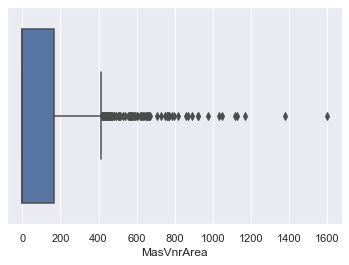

In [377]:
#To understand if thre are any outliers in the column
sns.boxplot('MasVnrArea', data = house)

In [378]:
house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].median())

In [379]:

house['MasVnrArea'].isnull().sum()

0

In [380]:

house['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [381]:
house['MasVnrType'].mode()

0    None
dtype: object

In [382]:
#Replacing it with the mode i.e. the None
house['MasVnrType'] = house['MasVnrType'].replace(np.nan, 'None')

In [383]:
house['MasVnrType'].isnull().sum()

0

## Electrical

In [384]:
house['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [385]:
#Replacing it with the mode i.e. the SBrkr
house['Electrical'] = house['Electrical'].replace(np.nan, 'SBrkr')

In [386]:
# Checking the percentage of null values in the dataframe 'housing' column-wise
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending=False)

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
TotalBsmtSF      0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
BsmtUnfSF        0.0
Heating          0.0
SaleCondition    0.0
OpenPorchSF      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF   

# EDA

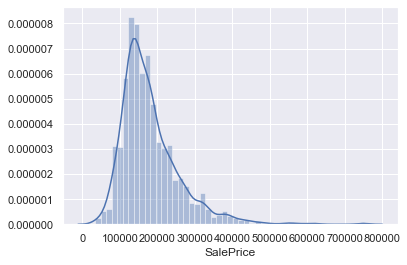

In [387]:
#To see if the 'SalePrice' column is normally distributed to apply regression on it
sns.distplot(house['SalePrice'])

In [388]:
house.shape

(1460, 77)

In [389]:
#converting the MSSubClass into a object class as the current column is being identified as int where in actual its being an categorical
house['MSSubClass'] = house['MSSubClass'].astype(object)

In [390]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [391]:
house.shape

(1460, 77)

In [392]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [393]:
# lets drop the Id column as we wont need it for the analysis
house = house.drop('Id',axis='columns')

# Separting numerical and categorical data

In [394]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,17,17,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,17.0,2,548,0,61,0,0,0,0,0,2,12,208500
1,80.0,9600,6,8,44,44,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,44.0,2,460,298,0,0,0,0,0,0,5,13,181500
2,68.0,11250,7,5,19,18,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,19.0,2,608,0,42,0,0,0,0,0,9,12,223500
3,60.0,9550,7,5,105,50,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,22.0,3,642,0,35,272,0,0,0,0,2,14,140000
4,84.0,14260,8,5,20,20,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,20.0,3,836,192,84,0,0,0,0,0,12,12,250000


### Features with continous variables

In [395]:
house_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [396]:
house_catg = house.select_dtypes('object')

### Features with categorical variables

In [397]:
print(house_catg.columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


###  lets check for any outliers

In [398]:
house.describe([0.25,0.50,0.75,0.99])

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,6.099315,5.575342,48.732192,35.134247,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,41.493836,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,12.184247,180921.195890
std,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,34900.000000
25%,60.000000,7553.500000,5.000000,5.000000,20.000000,16.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,19.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,11.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,47.000000,26.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,41.493836,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,12.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,66.000000,53.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,58.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,13.000000,214000.000000
99%,137.410000,37567.640000,10.000000,9.000000,120.820000,70.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,102.820000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,14.000000,442567.010000
max,313.000000,215245.000000,10.000000,9.000000,148.000000,70.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,120.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,14.000000,755000.000000


In [399]:
### we still se some outliers in some features.lets drop them using the function below
def drop_outliers(x):
    list = []
    for col in house_numeric.columns:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house = drop_outliers(house)

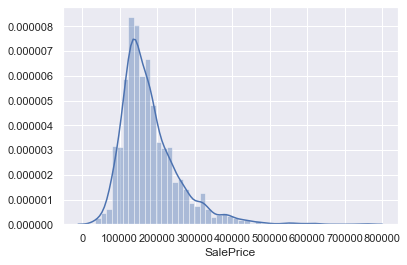

In [400]:
#To see if the 'SalePrice' column is normally distributed to apply regression on it
sns.distplot(house['SalePrice'])

<Figure size 2880x2160 with 0 Axes>

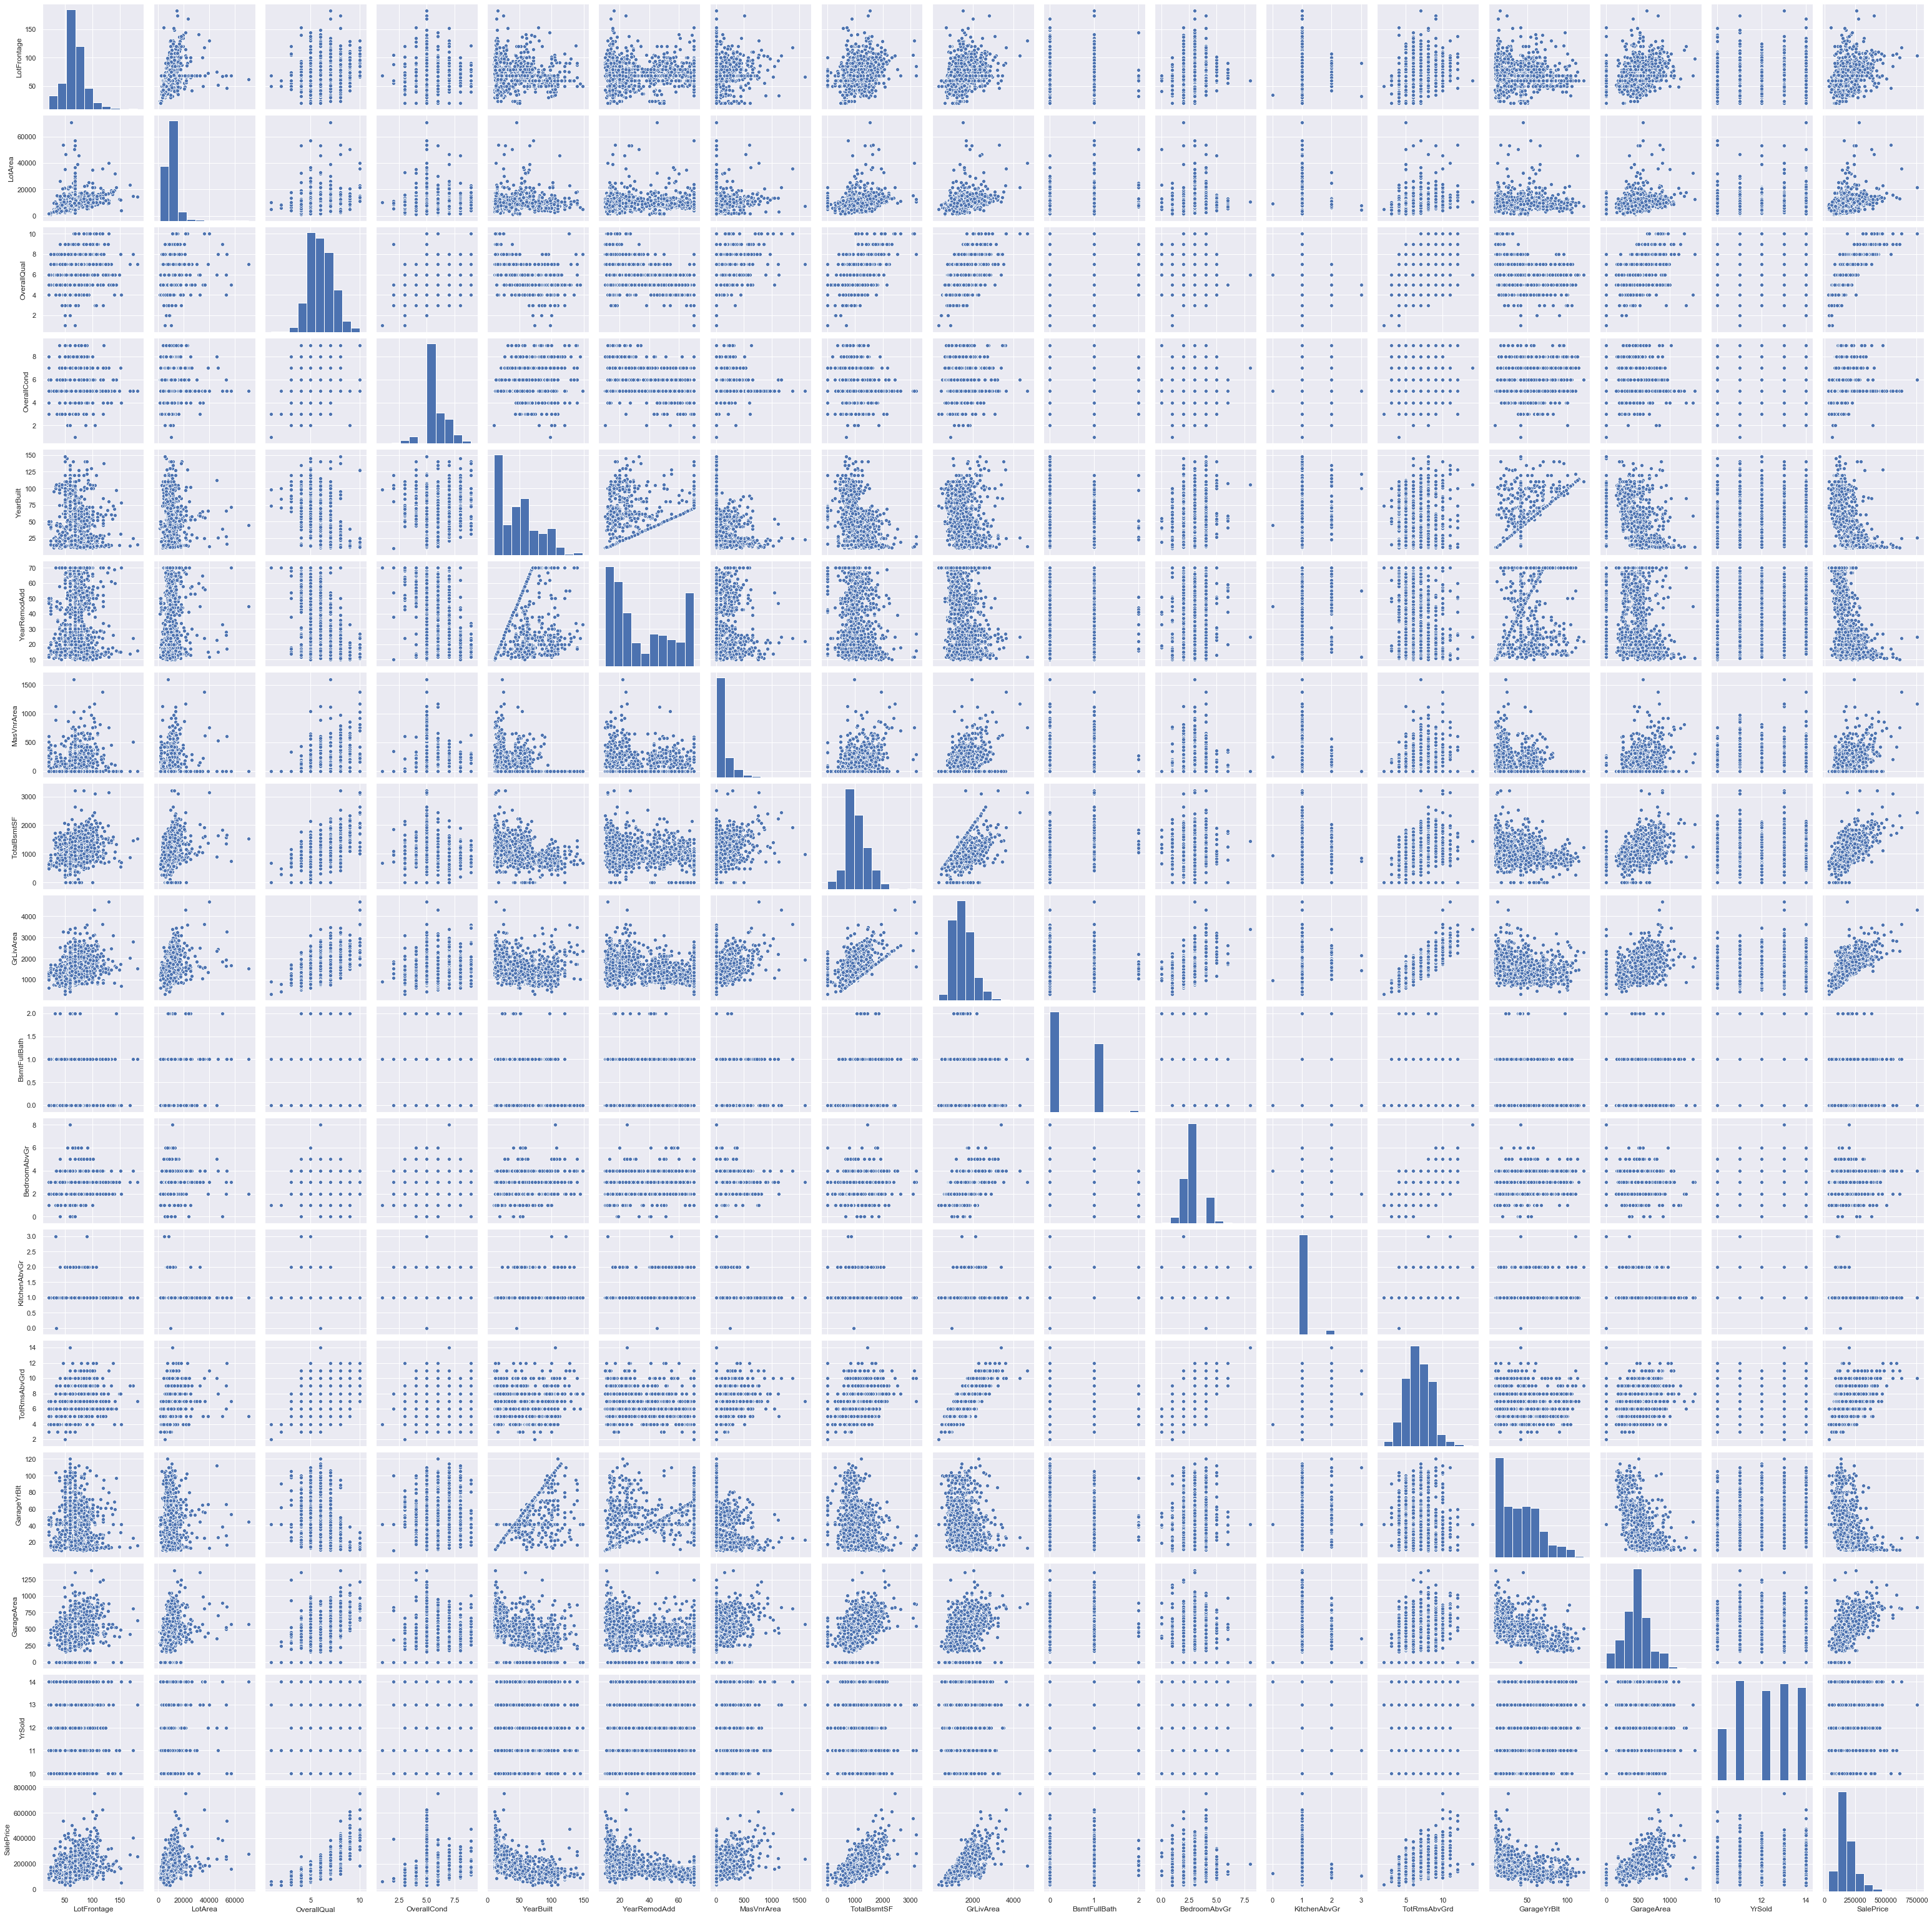

In [401]:
#plotting scatter plot for some of the numeric variables
sns.set()
plt.figure(figsize=(40, 30))
cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',  'GrLivArea',
       'BsmtFullBath',   'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
        'GarageArea',   'YrSold', 'SalePrice']
sns.pairplot(house[cols], size = 2.5)
plt.show();

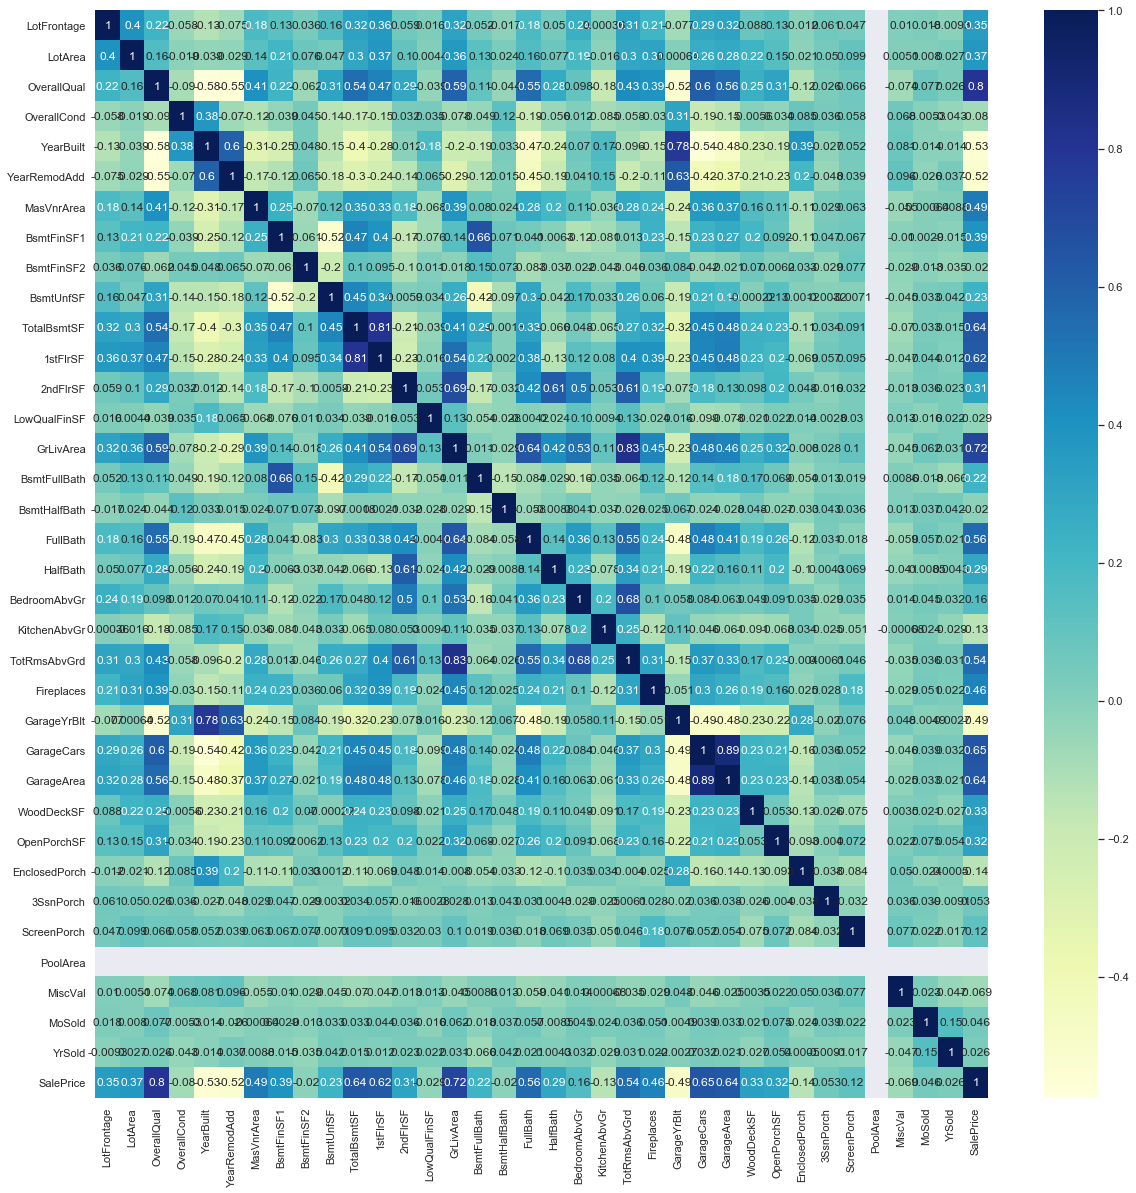

In [402]:
# Correlation heat map
plt.figure(figsize = (20, 20))
nhouse=house[house_numeric.columns]
cp=nhouse.corr()
sns.heatmap(cp, annot = True, cmap="YlGnBu")
plt.show()

### Creating dummy variables and dropping the original columns

In [403]:
dummy_col = pd.get_dummies(house[['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition']],drop_first=True)

house = pd.concat([house,dummy_col],axis='columns')

house = house.drop(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],axis='columns')

# Lets starting Building the Models

In [404]:
# importing the required libraries and modules

In [405]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


In [406]:
## test train split
df_train,df_test = train_test_split(house,train_size=0.7,test_size=0.3,random_state=42)

In [407]:
from sklearn.preprocessing import StandardScaler

#scaling continuous variables in the dataset
scaler = StandardScaler()

In [408]:
# scaling the train and test sets.***its only transform for the test data
df_train[house_numeric.columns] = scaler.fit_transform(df_train[house_numeric.columns])
df_test[house_numeric.columns] = scaler.transform(df_test[house_numeric.columns])

## extracting X and y for train and test sets

In [409]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [410]:

y_test = df_test.pop('SalePrice')
X_test = df_test

### lets run RFE for feature selection as there are too many variables in the data set.

In [411]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=70, step=1, verbose=0)

In [412]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [413]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [414]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 125),
 ('LotArea', False, 48),
 ('OverallQual', True, 1),
 ('OverallCond', False, 34),
 ('YearBuilt', False, 27),
 ('YearRemodAdd', False, 62),
 ('MasVnrArea', False, 53),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 138),
 ('BsmtHalfBath', False, 185),
 ('FullBath', False, 147),
 ('HalfBath', False, 178),
 ('BedroomAbvGr', False, 141),
 ('KitchenAbvGr', False, 104),
 ('TotRmsAbvGrd', False, 142),
 ('Fireplaces', False, 160),
 ('GarageYrBlt', False, 164),
 ('GarageCars', False, 82),
 ('GarageArea', False, 17),
 ('WoodDeckSF', False, 132),
 ('OpenPorchSF', False, 169),
 ('EnclosedPorch', False, 149),
 ('3SsnPorch', False, 166),
 ('ScreenPorch', False, 130),
 ('PoolArea', True, 1),
 ('MiscVal', False, 176),
 ('MoSold', False, 163),
 ('YrSold', False, 159),
 ('MSSubClass_30', False, 

### I have done ridge and lasso regression using the above selected features and i saw huge differences between train and test scores for each regression model.So I went ahead with ridge and lasso  using the full set of variables.

# Ridge Regression

In [415]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,30,40,50,100,200 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [416]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006484,0.004970,0.001214,0.000139,0.0001,{'alpha': 0.0001},-0.239666,-0.242939,-0.252603,-0.233021,-0.232111,-0.240068,0.007463,29,-0.145655,-0.148472,-0.152092,-0.146499,-0.145023,-0.147548,0.002552
1,0.003636,0.000097,0.001073,0.000013,0.001,{'alpha': 0.001},-0.239355,-0.242801,-0.252476,-0.232775,-0.232139,-0.239909,0.007455,28,-0.145676,-0.148478,-0.152115,-0.146553,-0.145048,-0.147574,0.002548
2,0.003970,0.000399,0.001235,0.000106,0.01,{'alpha': 0.01},-0.236839,-0.241625,-0.251357,-0.231060,-0.232239,-0.238624,0.007380,27,-0.145874,-0.148555,-0.152305,-0.146991,-0.145251,-0.147795,0.002519
3,0.003973,0.000261,0.001279,0.000078,0.05,{'alpha': 0.05},-0.230002,-0.237854,-0.248179,-0.228065,-0.233546,-0.235529,0.007150,26,-0.146712,-0.149064,-0.152893,-0.148204,-0.146064,-0.148588,0.002400
4,0.003632,0.000290,0.001174,0.000129,0.1,{'alpha': 0.1},-0.224896,-0.234597,-0.245480,-0.226993,-0.233833,-0.233160,0.007220,25,-0.147749,-0.149774,-0.153508,-0.149296,-0.146925,-0.149450,0.002274


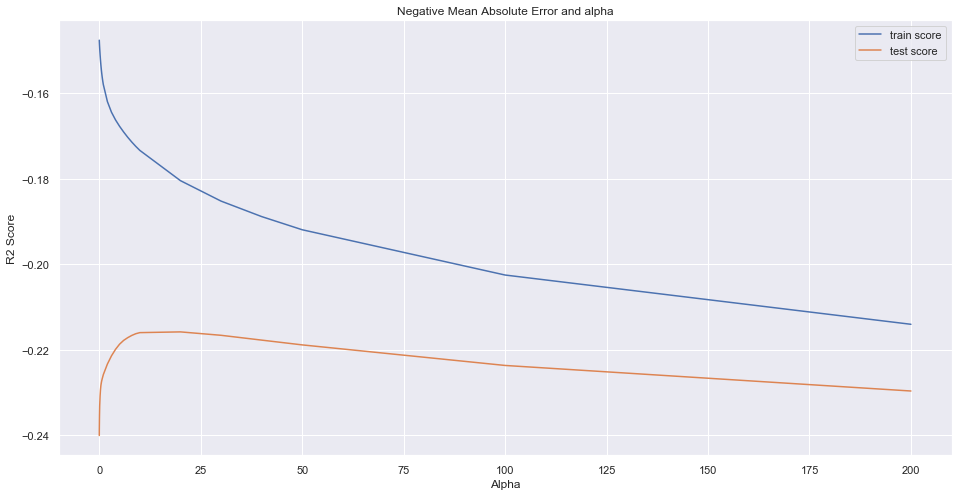

In [417]:
#plotting mean test score vs alpha
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.title("Negative Mean Absolute Error and alpha")
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper Right')
plt.show()

In [418]:
model_cv.best_params_

{'alpha': 20}

In [419]:
ridge = Ridge(alpha = 20.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9139447247497186
0.8933219480246025


In [420]:
ridge.coef_

array([ 1.52345392e-02,  5.45820697e-02,  1.81424460e-01,  8.64351495e-02,
       -8.66200082e-02, -3.11963841e-02,  7.46332382e-02,  9.36247440e-02,
        2.19107047e-02,  3.46380863e-04,  1.08086837e-01,  4.84896210e-02,
        1.49366848e-01, -1.63068525e-03,  1.62063691e-01,  2.81364672e-02,
        4.69669181e-04,  2.89234211e-02,  2.47682969e-02, -3.53253320e-02,
       -5.83282312e-02,  6.60528277e-02,  6.65767135e-02, -1.01997974e-02,
        3.63105661e-02,  7.51155914e-02,  3.93329508e-02, -1.08653678e-02,
        1.21193613e-02,  1.44602241e-02,  3.71787021e-02,  0.00000000e+00,
       -4.79270759e-03, -1.39925874e-02,  1.40745326e-02,  3.75434494e-02,
        1.93848825e-02,  3.05879021e-02,  2.26596284e-03, -2.12591486e-03,
        4.33962448e-02, -6.87367829e-03, -1.18915368e-02, -3.31922344e-02,
       -9.88951628e-03, -6.09987573e-02, -5.00837862e-02,  3.19566745e-02,
       -3.54586626e-02,  4.70768721e-02,  1.67409135e-02,  3.55105104e-02,
       -3.74366530e-02,  

In [421]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [422]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
127,Exterior1st_AsphShn,0.197435
82,Neighborhood_NridgHt,0.190890
83,Neighborhood_OldTown,0.184317
3,OverallCond,0.181424
73,Neighborhood_Edwards,0.166024
15,BsmtFullBath,0.162064
13,LowQualFinSF,0.149367
101,Condition2_PosA,0.143683
180,BsmtExposure_Mn,0.139312
89,Neighborhood_Timber,0.135271


# Lasso Regression

In [423]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [424]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.093112,0.016524,0.001310,0.000116,0.0001,{'alpha': 0.0001},-0.220179,-0.221976,-0.234962,-0.226346,-0.220923,-0.224877,0.005477,2,-0.149643,-0.151672,-0.155994,-0.150930,-0.149586,-0.151565,0.002351
1,0.049733,0.013691,0.001196,0.000057,0.001,{'alpha': 0.001},-0.203180,-0.204773,-0.209956,-0.215191,-0.215493,-0.209718,0.005110,1,-0.165213,-0.166649,-0.171206,-0.164997,-0.164911,-0.166595,0.002390
2,0.009377,0.003133,0.001080,0.000064,0.01,{'alpha': 0.01},-0.242200,-0.235927,-0.224440,-0.249035,-0.244734,-0.239267,0.008543,3,-0.224413,-0.221694,-0.221909,-0.217020,-0.223752,-0.221758,0.002588
3,0.004819,0.000101,0.001066,0.000039,0.05,{'alpha': 0.05},-0.271648,-0.262644,-0.242893,-0.278733,-0.283598,-0.267903,0.014358,4,-0.260123,-0.260688,-0.265820,-0.262869,-0.256200,-0.261140,0.003179
4,0.004523,0.000419,0.001047,0.000022,0.1,{'alpha': 0.1},-0.278036,-0.277648,-0.247504,-0.298283,-0.312840,-0.282862,0.022078,5,-0.275455,-0.277457,-0.275909,-0.278374,-0.275492,-0.276537,0.001173


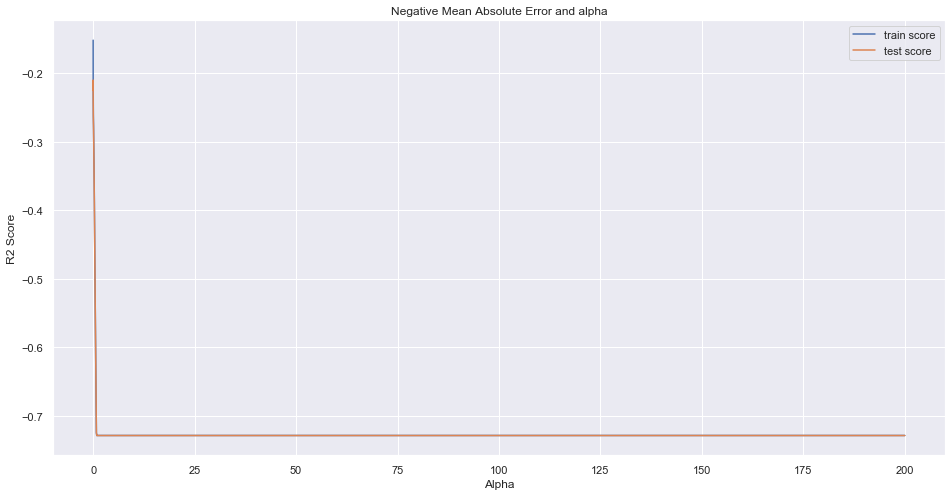

In [425]:
#plotting mean test score vs alpha
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.title("Negative Mean Absolute Error and alpha")
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper Right')
plt.show()

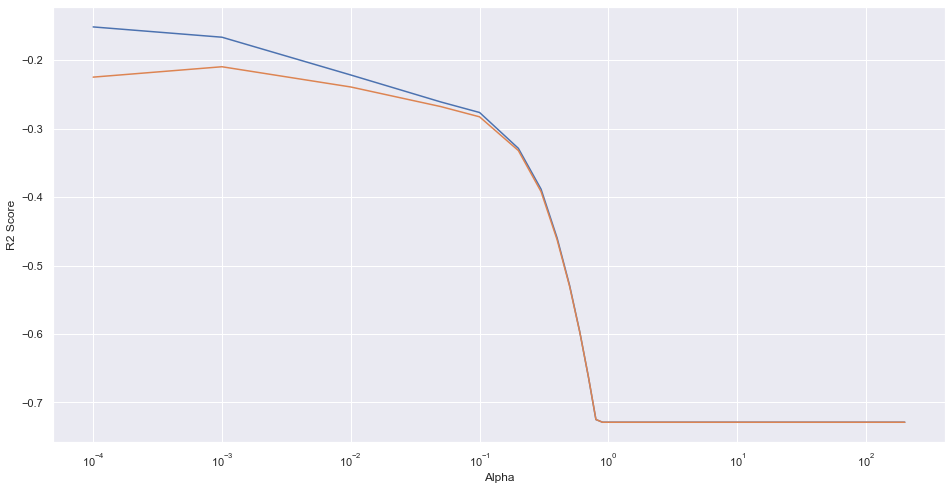

In [426]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [427]:
model_cv.best_params_

{'alpha': 0.001}

In [428]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9395864255414085
0.8648142983439429


In [429]:
lasso.coef_

array([ 2.28002492e-02,  5.01645265e-02,  1.42339658e-01,  8.85194207e-02,
       -1.16577506e-01, -2.59111595e-02,  6.48155219e-02,  9.32442444e-02,
        2.27027180e-02, -0.00000000e+00,  1.15218510e-01,  0.00000000e+00,
        8.15983331e-02, -2.12823973e-02,  2.96305753e-01,  2.16298062e-02,
       -4.18611268e-04,  3.12696479e-02,  1.66386657e-02, -3.69641407e-02,
       -6.67323473e-02,  3.48115058e-02,  2.85413404e-02, -6.61831372e-03,
        2.60752441e-02,  5.44692393e-02,  2.87012389e-02,  0.00000000e+00,
        1.08968079e-02,  7.42037465e-03,  2.93917895e-02,  0.00000000e+00,
       -7.73141210e-04, -1.07393059e-02,  9.76662606e-03,  4.39459627e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.59821044e-02, -0.00000000e+00,  0.00000000e+00, -1.14877385e-02,
       -0.00000000e+00, -8.11653186e-02, -6.39395250e-02,  0.00000000e+00,
       -3.00329467e-04,  5.27788952e-02,  0.00000000e+00,  6.29273473e-02,
       -0.00000000e+00,  

In [430]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [431]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
127,Exterior1st_AsphShn,1.034098
82,Neighborhood_NridgHt,0.317291
73,Neighborhood_Edwards,0.298146
89,Neighborhood_Timber,0.297077
15,BsmtFullBath,0.296306
83,Neighborhood_OldTown,0.252536
250,SaleType_Oth,0.214646
180,BsmtExposure_Mn,0.199231
130,Exterior1st_CBlock,0.173833
62,LotConfig_FR2,0.173664


#### Plotting the error distribution for training data for Ridge and lasso distribution.

In [432]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)
#y_pred_ridge_test = ridge.predict(X_test)

Error distribution in train dataset


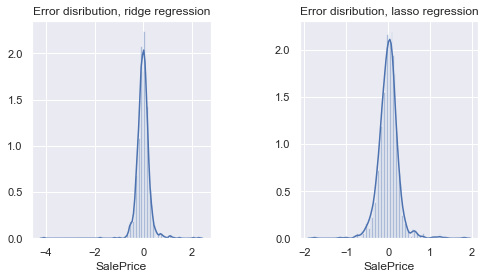

In [433]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [434]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.9139447247497186
r2_score for lasso: 0.9395864255414085


#### Plotting the error distribution for test data for Ridge and lasso distribution.

In [435]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


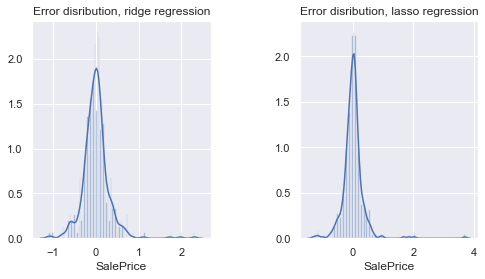

In [436]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [437]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.91
r2_score for lasso: 0.94
r2_score in test dataset:
r2_score for ridge: 0.89
r2_score for lasso: 0.86


# Final Conclusion

Optimum value for lambda in ridge regression is 20
Optimum value for lambda in lasso regression is 0.001
Since Lasso also covers the variable selection during model building.
Choosing lasso model gives best estimates in descion making.

R2 Values for both Ridge and Lasso gression for Train and test data:
R2 Ridge:
Train:0.91
Test:0.89

R2 Lasso:
Train:0.94
Test:0.86

Since the company is entering into the business in a new territory and now it has the potential indicators.
It can showcase the negative indicators to buy the properties at a low price and latter work on those features and sell the properties for a higher price.






## Doubling the ridge alpha value to look at changes

In [438]:
ridge = Ridge(alpha = 40)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9042110396976408
0.8926909233612683


In [439]:
ridge.coef_

array([ 0.01875347,  0.05552691,  0.19054738,  0.0845825 , -0.07474146,
       -0.03267738,  0.08313532,  0.09475664,  0.01917905,  0.00125243,
        0.10908642,  0.05695188,  0.13209303, -0.00100801,  0.15334835,
        0.02615651, -0.00122266,  0.02914122,  0.02839526, -0.03805833,
       -0.05881415,  0.0670732 ,  0.06036256, -0.01358761,  0.03830929,
        0.07679369,  0.03939322, -0.01090806,  0.01047918,  0.01208656,
        0.03657656,  0.        , -0.00544341, -0.01318372,  0.01262398,
        0.02395503,  0.00936272,  0.01847916,  0.00326694,  0.00020439,
        0.02859586, -0.00367577, -0.01540034, -0.02009164, -0.0088407 ,
       -0.03921371, -0.03782132,  0.0194831 , -0.02676097,  0.03216293,
        0.01020963,  0.03133257, -0.03954674,  0.02894   ,  0.0410146 ,
        0.00141807,  0.0074111 ,  0.07291668, -0.03168386,  0.06104208,
       -0.01036394,  0.09146494, -0.03363962, -0.01831983, -0.01087382,
        0.04565753, -0.01473165, -0.00138363, -0.01528202,  0.02

In [440]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [441]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
3,OverallCond,0.190547
15,BsmtFullBath,0.153348
83,Neighborhood_OldTown,0.143147
13,LowQualFinSF,0.132093
82,Neighborhood_NridgHt,0.131426
73,Neighborhood_Edwards,0.121695
180,BsmtExposure_Mn,0.112331
127,Exterior1st_AsphShn,0.110910
11,1stFlrSF,0.109086
93,Condition1_PosA,0.105090


## Doubling the lasso alpha value to look at changes

In [442]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9288099087293039
0.8824409194516926


In [443]:
lasso.coef_

array([ 2.05704695e-02,  5.29195944e-02,  1.65620979e-01,  8.87930396e-02,
       -1.09147556e-01, -2.65450632e-02,  6.97363074e-02,  9.21931941e-02,
        1.40143551e-02, -0.00000000e+00,  1.13470098e-01,  0.00000000e+00,
        5.95298034e-02, -1.64620456e-02,  2.86953897e-01,  2.27424778e-02,
       -1.32921322e-03,  2.37831693e-02,  1.18915027e-02, -3.69547652e-02,
       -6.38020578e-02,  4.24478550e-02,  2.64179909e-02, -1.41867012e-02,
        2.36120822e-02,  5.58746380e-02,  2.97384069e-02, -0.00000000e+00,
        8.44307257e-03,  5.64421369e-03,  2.95561172e-02,  0.00000000e+00,
       -2.56358083e-03, -1.11581885e-02,  6.48247079e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -5.48304903e-02, -4.05048339e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.62510597e-02,
       -3.56825147e-02,  

In [444]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [445]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
127,Exterior1st_AsphShn,0.762878
82,Neighborhood_NridgHt,0.292755
15,BsmtFullBath,0.286954
73,Neighborhood_Edwards,0.271456
83,Neighborhood_OldTown,0.246467
89,Neighborhood_Timber,0.223855
250,SaleType_Oth,0.214186
180,BsmtExposure_Mn,0.177480
3,OverallCond,0.165621
130,Exterior1st_CBlock,0.153800


## Building the Lasso model excluding the current top five predictors.

#Top 5 in Lasso
Exterior1st_AsphShn
Neighborhood_NridgHt
Neighborhood_Edwards
Neighborhood_Timber
BsmtFullBath

In [446]:
X_train_new=X_train.drop(['Exterior1st_AsphShn', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'Neighborhood_Timber','BsmtFullBath'], axis =1)
X_test_new=X_test.drop(['Exterior1st_AsphShn', 'Neighborhood_NridgHt', 'Neighborhood_Edwards', 'Neighborhood_Timber','BsmtFullBath'], axis =1)

In [447]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [448]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.063793,0.023689,0.001334,0.000163,0.0001,{'alpha': 0.0001},-0.222740,-0.225515,-0.242921,-0.223308,-0.215856,-0.226068,0.009026,2,-0.152002,-0.152843,-0.158143,-0.152528,-0.152349,-0.153573,0.002301
1,0.040287,0.009539,0.001038,0.000050,0.001,{'alpha': 0.001},-0.207954,-0.208212,-0.212405,-0.210218,-0.209031,-0.209564,0.001625,1,-0.167063,-0.167846,-0.174362,-0.168175,-0.168815,-0.169252,0.002617
2,0.007633,0.002361,0.000940,0.000015,0.01,{'alpha': 0.01},-0.243588,-0.236822,-0.224617,-0.251589,-0.245720,-0.240467,0.009225,3,-0.226214,-0.223619,-0.222661,-0.218129,-0.226635,-0.223452,0.003058
3,0.004643,0.000442,0.001015,0.000097,0.05,{'alpha': 0.05},-0.271648,-0.262219,-0.242893,-0.278733,-0.282774,-0.267653,0.014212,4,-0.260123,-0.260905,-0.265820,-0.262869,-0.256781,-0.261300,0.002995
4,0.004612,0.000396,0.001070,0.000075,0.1,{'alpha': 0.1},-0.278036,-0.277648,-0.247504,-0.298283,-0.312840,-0.282862,0.022078,5,-0.275455,-0.277457,-0.275909,-0.278374,-0.275492,-0.276537,0.001173


In [449]:
model_cv.best_params_

{'alpha': 0.001}

In [450]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_new,y_train)



Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [451]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [452]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
123,RoofMatl_Roll,0.969639
72,Neighborhood_Crawfor,0.312363
15,BsmtFullBath,0.279358
80,Neighborhood_NWAmes,0.259050
245,SaleType_Con,0.240119
86,Neighborhood_SawyerW,0.208583
175,BsmtCond_Gd,0.181961
125,RoofMatl_WdShake,0.175995
61,LotConfig_CulDSac,0.168388
213,Functional_Min1,0.157676


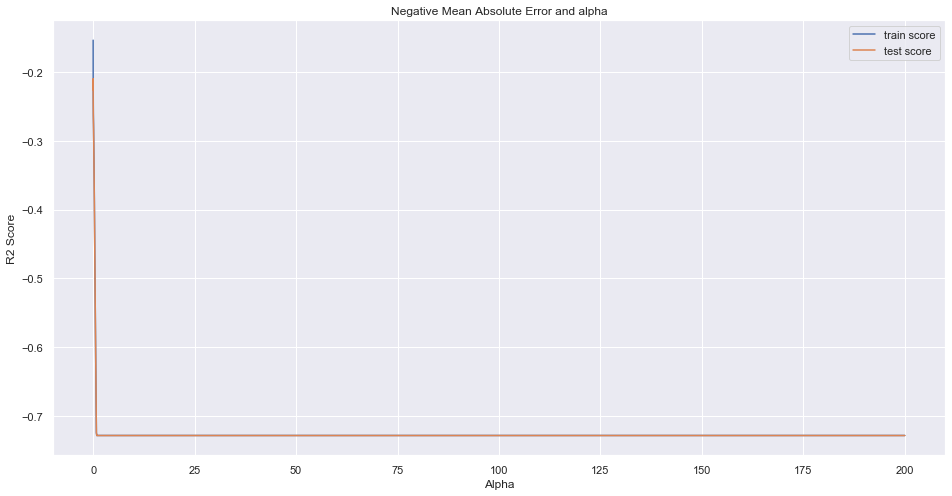

In [453]:
#plotting mean test score vs alpha
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.title("Negative Mean Absolute Error and alpha")
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper Right')
plt.show()